In [77]:
import pandas as pd
import sys
import csv
from pprint import pprint
from datetime import datetime
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
default_color = "#2171b5"

In [65]:
csv.field_size_limit(sys.maxsize)
df_review = pd.read_csv('Seattle/reviews_seattle.csv', sep=None,engine='python')
df_rest = pd.read_csv('Seattle/restaurants_seattle.csv', sep=None,engine='python')
df_merged = pd.read_csv('Seattle/instances_mergerd_seattle.csv', sep=None,engine='python')

In [48]:
LA = pd.read_csv('lasVegas_dataset.csv',sep=None,engine='python')

In [66]:
df = df_merged.iloc[:,:-1]

In [67]:
df.describe()

,inspection_penalty_score,inspection_average_prev_penalty_scores,inspection_prev_penalty_score,zip_code,review_count,non_positive_review_count,average_review_rating
count,13299.000000,13299.000000,13299.000000,13299.000000,13299.000000,13299.000000,13299.000000
mean,12.184600,12.901018,11.894127,98113.023611,11.440935,3.339123,3.625290
std,14.832751,10.561251,15.618350,14.846820,18.422798,5.138747,0.805269
min,-1.000000,-1.000000,-1.000000,98101.000000,1.000000,0.000000,1.000000
25%,0.000000,4.692308,0.000000,98104.000000,2.000000,1.000000,3.166667
50%,7.000000,11.400000,5.000000,98108.000000,6.000000,2.000000,3.750000
75%,20.000000,19.200000,18.000000,98119.000000,13.000000,4.000000,4.111111
max,115.000000,82.000000,152.000000,98199.000000,568.000000,98.000000,5.000000


In [68]:
df.columns

Index(['inspection_id', 'restaurant_id', 'inspection_period_start_date',
       'inspection_period_end_date', 'inspection_penalty_score',
       'inspection_average_prev_penalty_scores',
       'inspection_prev_penalty_score', 'cuisines', 'zip_code', 'review_count',
       'non_positive_review_count', 'average_review_rating'],
      dtype='object')

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13299 entries, 0 to 13298
Data columns (total 12 columns):
inspection_id                             13299 non-null object
restaurant_id                             13299 non-null object
inspection_period_start_date              13299 non-null object
inspection_period_end_date                13299 non-null object
inspection_penalty_score                  13299 non-null int64
inspection_average_prev_penalty_scores    13299 non-null float64
inspection_prev_penalty_score             13299 non-null int64
cuisines                                  13299 non-null object
zip_code                                  13299 non-null int64
review_count                              13299 non-null int64
non_positive_review_count                 13299 non-null int64
average_review_rating                     13299 non-null float64
dtypes: float64(2), int64(5), object(5)
memory usage: 1.2+ MB


In [70]:
df.inspection_period_start_date = pd.to_datetime(df.inspection_period_start_date)
df.inspection_period_end_date = pd.to_datetime(df.inspection_period_end_date)

In [71]:
df['inspection_year'] = df["inspection_period_end_date"].dt.year

In [72]:
df.inspection_year.value_counts()

2012    3175
2011    2578
2010    2067
2009    1781
2008    1407
2007    1094
2006     704
2013     493
Name: inspection_year, dtype: int64

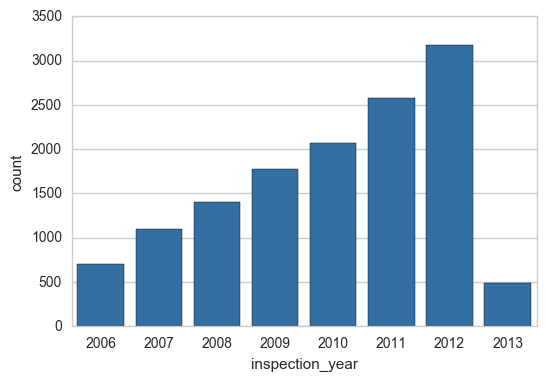

In [78]:
sns.countplot(x=df.inspection_year, data=df, color=default_color)

In [79]:
df['inspection_month'] = df["inspection_period_end_date"].dt.month

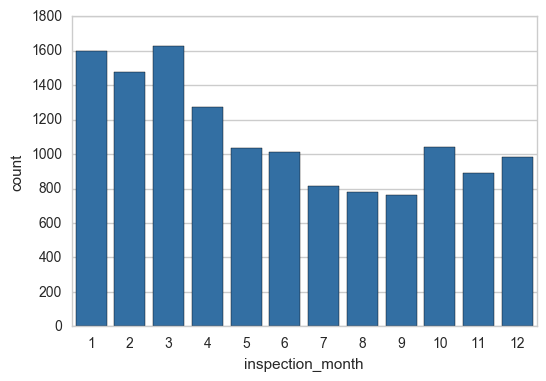

In [84]:
sns.countplot(x=df.inspection_month, data=df, color= default_color)

In [85]:
# Remove inpection_score = -1 outlier
df = df[df["inspection_penalty_score"] >= 0]
df.shape

(13298, 14)

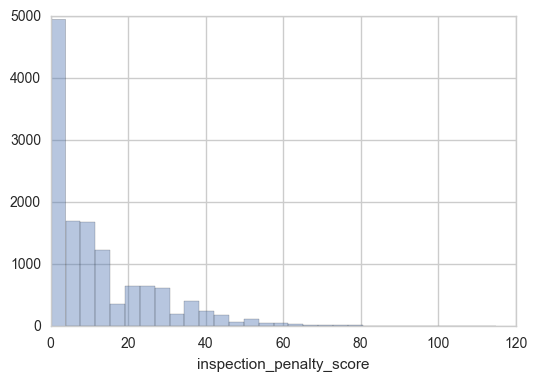

In [86]:
sns.distplot(df.inspection_penalty_score, bins=30, kde=False, rug=False)

In [87]:
rest_count = df.restaurant_id.value_counts()

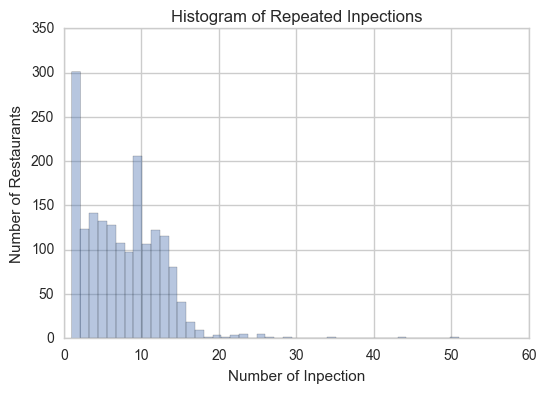

In [184]:
# Repeated inspection
g = sns.distplot(rest_count, kde=False)
g.set(xlabel='Number of Inpection', ylabel='Number of Restaurants')
plt.title("Histogram of Repeated Inpections")
plt.show(g)

## Review rating is not informative!

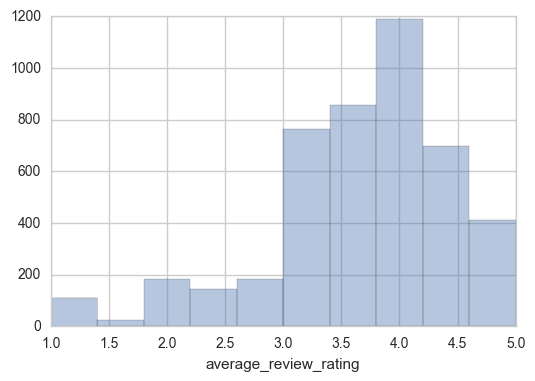

In [90]:
# No code violation restaurant
sns.distplot(df[df["inspection_penalty_score"] == 0]["average_review_rating"], bins = 10,kde=False)

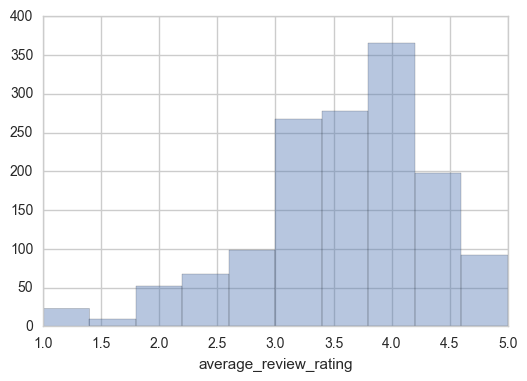

In [91]:
sns.distplot(df[df["inspection_penalty_score"] > 30]["average_review_rating"], bins = 10,kde=False)

In [105]:
df[df["inspection_penalty_score"] > 70][["average_review_rating","inspection_penalty_score"]].corr(method= 'spearman')

,average_review_rating,inspection_penalty_score
average_review_rating,1.000000,-0.037521
inspection_penalty_score,-0.037521,1.000000


In [185]:
corr = []
thresholds = [0,10,20,30,40,50,60,70]
for i in thresholds:
    corr_table = df[df["inspection_penalty_score"] > i][["average_review_rating","inspection_penalty_score"]].corr(method= 'spearman')
    corr.append(corr_table.iloc[0][1])

In [186]:
pprint(corr)

[-0.02207259746033036,
 -0.002188622860368267,
 -0.010485875793782986,
 -0.033408624862005194,
 -0.0022896343873826351,
 0.032434853142697395,
 0.063462949769724095,
 -0.037520661438255151]


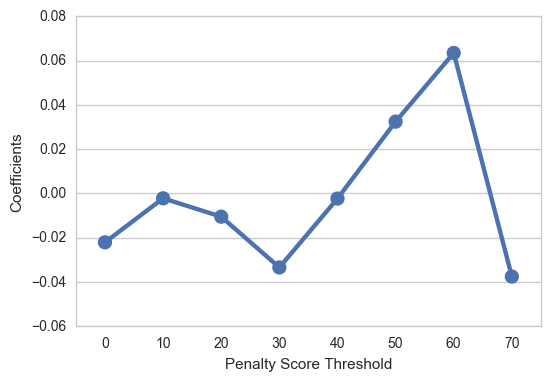

In [187]:
g = sns.pointplot(thresholds, corr)
g.set(xlabel='Penalty Score Threshold', ylabel='Coefficients')
g

**Weird that penalty score positively correlated with average rating**

## Review Count (Positive corr)

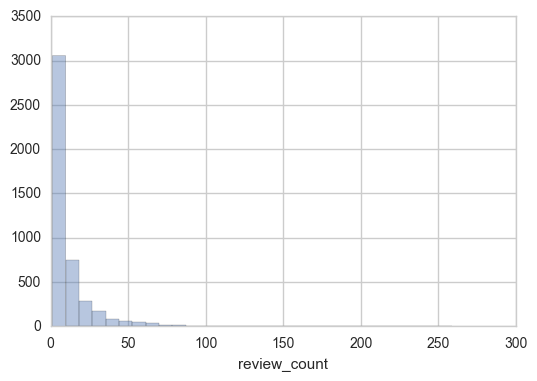

In [188]:
sns.distplot(df[df["inspection_penalty_score"] == 0]["review_count"], bins = 30,kde=False)

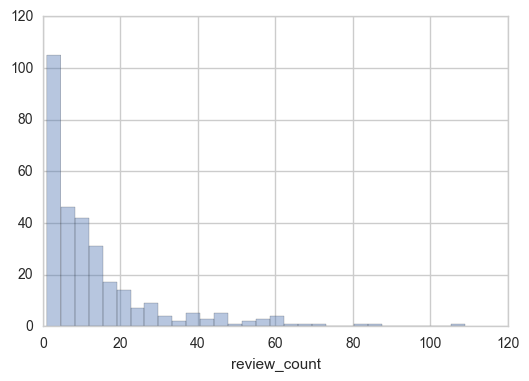

In [108]:
sns.distplot(df[df["inspection_penalty_score"] > 50]["review_count"], bins = 30,kde=False)

In [195]:
corr = []
thresholds = [0,10,20,30,40,50,60]
for i in thresholds:
    corr_table = df[df["inspection_penalty_score"] > i][["review_count","inspection_penalty_score"]].corr(method= 'spearman')
    corr.append(corr_table.iloc[0][1])

In [196]:
corr

[0.060375041888524425,
 0.07187192947139126,
 0.064799403275717163,
 0.10394483434604006,
 0.067261105878299587,
 0.087246704017423821,
 0.042924595264368377]

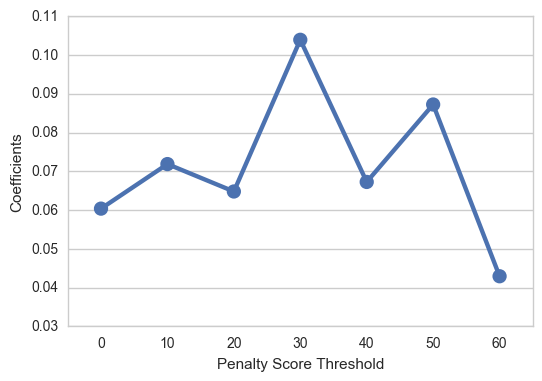

In [197]:
g = sns.pointplot(thresholds, corr)
g.set(xlabel='Penalty Score Threshold', ylabel='Coefficients')
g

## Geo Distribution

In [134]:
import geopandas as gpd

In [135]:
map = gpd.read_file("Seattle/zip-codes.geojson")

In [169]:
map['GEOID10'] = pd.to_numeric(map['GEOID10'])

In [176]:
vc = df[df["inspection_penalty_score"] > 0]["zip_code"].value_counts()
counts = pd.DataFrame({'GEOID10':vc.index, 'count':vc.values})

In [177]:
heatmap = pd.merge(map, counts, on = "GEOID10",how="left")

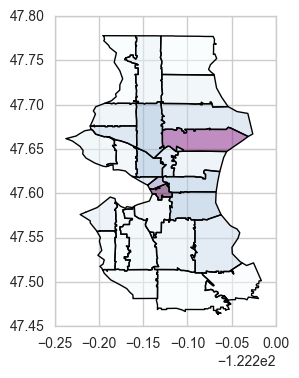

In [178]:
heatmap.plot(column='count',cmap='BuPu')

## Get individual review + corresponding inspection dataset

In [205]:
df_review.review_date = pd.to_datetime(df_review.review_date)
df_review.head()

,review_id,restaurant_id,user_id,locality,review_date,rating,content
0,review_8YPABYYCVcruRUBDtEm0SQ,tPCkMjU__3dQBC4c6tIqSw,3qWJ06zfWR7LZtvMwMiNsA,Seattle,2012-06-26,4.0,I highly recommend the Pad Thai. This is right...
1,review_h1lXPkpmq9YrPPa5U-koZw,tPCkMjU__3dQBC4c6tIqSw,3nnAZxAMAGt5ckDHyIBKQg,Seattle,2012-11-29,3.0,It might be the best place for lunch within a ...
2,review_m5hPEjiHaucArzTPnmcDPA,tPCkMjU__3dQBC4c6tIqSw,LXFxtBj842ERHXVgW0DWEw,Seattle,2012-07-16,2.0,"Meh... &#160;I was hoping for better, but the ..."
3,review_SypEMow501jtt2WHDKf1WA,tPCkMjU__3dQBC4c6tIqSw,ddS-8c3JHANKlmGKh3CgOw,Seattle,2012-03-29,2.0,Given that you can stand at the signpost at th...
4,review_jZWNPdWBDXWo3ruTt3Z4pQ,tPCkMjU__3dQBC4c6tIqSw,R6IJh37_tCMMmu2Dg7MdwQ,Seattle,2012-10-19,2.0,"10/2010: 123 Thai Food/Queen Anne/Seattle, Wa...."


In [206]:
df_re = pd.merge(df, df_review, on="restaurant_id", how="left")

In [207]:
df_re = df_re[(df_re.review_date >= df_re.inspection_period_start_date) & (df_re.review_date <= df_re.inspection_period_end_date)]

In [208]:
df_re.head()

,inspection_id,restaurant_id,inspection_period_start_date,inspection_period_end_date,inspection_penalty_score,inspection_average_prev_penalty_scores,inspection_prev_penalty_score,cuisines,zip_code,review_count,non_positive_review_count,average_review_rating,inspection_year,inspection_month,review_id,user_id,locality,review_date,rating,content
10,DA2383404,ZriNDCVxkCdVEO-X2sjHFw,2012-02-06,2012-10-02,0,22.384615,35,"['Japanese', 'Restaurants']",98116,1,0,5.000000,2012,10,review_Q9_9A9QmmpX4unYRcEQc8g,iU3Vwjf1ZJUl5r_Ha2jjbA,Seattle,2012-02-20,5.0,We went here this past weekend with zero expec...
27,DA2304227,ZriNDCVxkCdVEO-X2sjHFw,2011-11-03,2012-02-06,0,23.272727,40,"['Japanese', 'Restaurants']",98116,3,0,4.000000,2012,2,review_IveKyEloRTk8bHJ8xcpalA,3SSp4anHG1zPxurm8ahwfA,Seattle,2012-01-01,4.0,Lots of young families . Kind of sparse &#160;...
36,DA2304227,ZriNDCVxkCdVEO-X2sjHFw,2011-11-03,2012-02-06,0,23.272727,40,"['Japanese', 'Restaurants']",98116,3,0,4.000000,2012,2,review_1pIZlx4k7U8S-_dX-kzb4w,BKYMMC-DAPY-Oo14tdWA0A,Seattle,2011-11-15,4.0,Our favorite teriyaki in West Seattle! Generou...
45,DA2304227,ZriNDCVxkCdVEO-X2sjHFw,2011-11-03,2012-02-06,0,23.272727,40,"['Japanese', 'Restaurants']",98116,3,0,4.000000,2012,2,review_iaieVt5Tm_US0LTsHMSC6Q,lBPuoOFE7jRMpgvj40A1lQ,Seattle,2011-11-13,4.0,Seattle has a lot of great teriyaki. &#160;Thi...
54,DA2278690,ZriNDCVxkCdVEO-X2sjHFw,2011-01-06,2011-11-03,40,21.600000,10,"['Japanese', 'Restaurants']",98116,7,0,4.428571,2011,11,review_WxjHfhYRD3heTI6ETb7sdg,01jx8LovEJpYkaDAg5-g_A,Seattle,2011-01-26,4.0,This place is a gem! My husband and I didn't h...


In [213]:
df_review.shape

(283740, 7)

In [214]:
df_re.shape

(162310, 20)

In [217]:
df_re.to_csv("individual_review_inspection_merged.csv")